In [10]:
import slabguides as guides
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
guide_size = 7e-6
wavelength = 1.55e-6

In [12]:
mode1 = guides.TE_MGMode(mode=1, mirror_distance=guide_size, wavelength=wavelength)
mode2 = guides.TE_MGMode(mode=2, mirror_distance=guide_size, wavelength=wavelength)

y_range = np.linspace(-0.5*guide_size, 0.5*guide_size, 1000)
z_range = np.linspace(0, 3e-4, 1000)

yy, zz = np.meshgrid(y_range, z_range)

In [13]:
Ex1 = mode1.Ex(yy, zz)
Ex2 = mode2.Ex(yy, zz)

Ex = Ex1 + Ex2
ExEx = np.real( Ex * np.conjugate(Ex) )

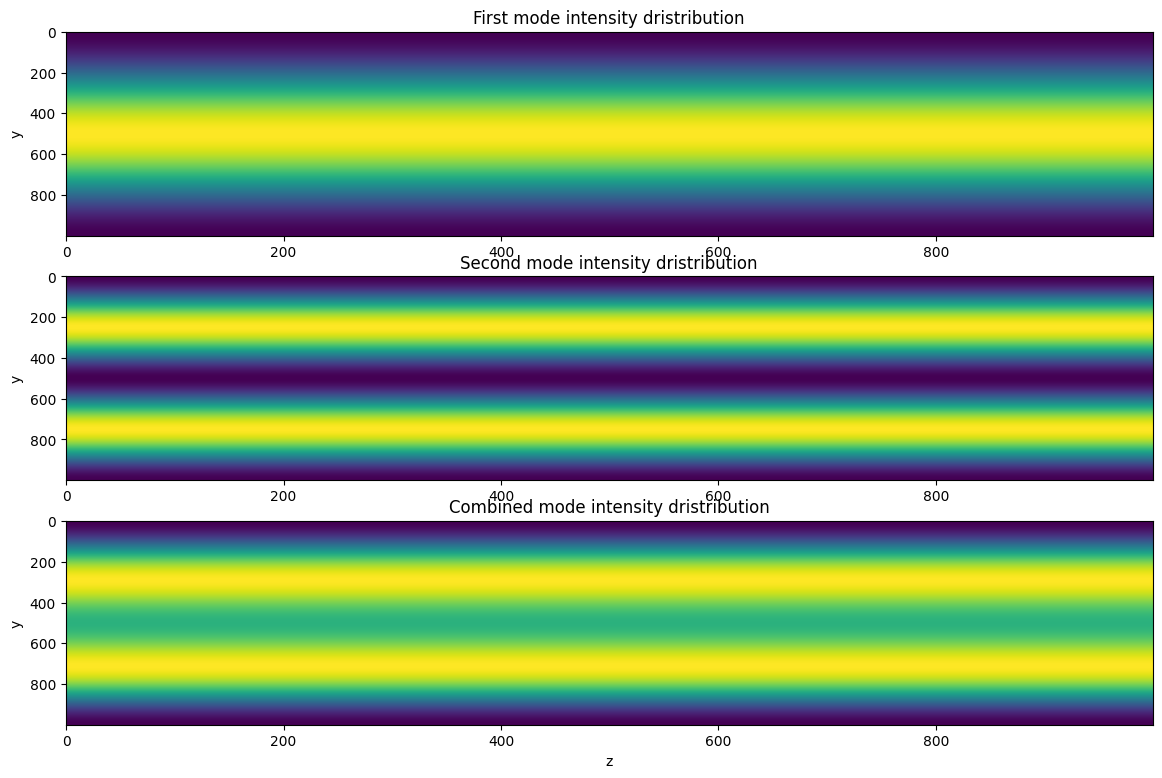

In [14]:
fig, axs = plt.subplots(3, 1, figsize=(16,9))
axs[0].imshow(np.real( Ex1 * np.conjugate(Ex1) ).T, aspect=3/16)
axs[0].set(title="First mode intensity dristribution", ylabel="y")

axs[1].imshow(np.real( Ex2 * np.conjugate(Ex2) ).T, aspect=3/16)
axs[1].set(title="Second mode intensity dristribution", ylabel='y')

axs[2].imshow(ExEx.T, aspect=3/16)
axs[2].set(title="Combined mode intensity dristribution",
           xlabel="z", ylabel="y")
plt.show()


In [15]:
d_mode1 = guides.TE_DGMode(0, 1.45, 1, wavelength, guide_size)
print("Maximum number of modes:", d_mode1.maximum_mode())

Maximum number of modes: 7


C:\Users\Ivan\AppData\Local\Temp\ipykernel_19480\3683061445.py:3: RuntimeWarning: divide by zero encountered in divide
  left_side_equation = lambda theta: np.sqrt( np.sin(d_mode1.theta_c)**2 / np.sin(theta)**2 - 1 ) \


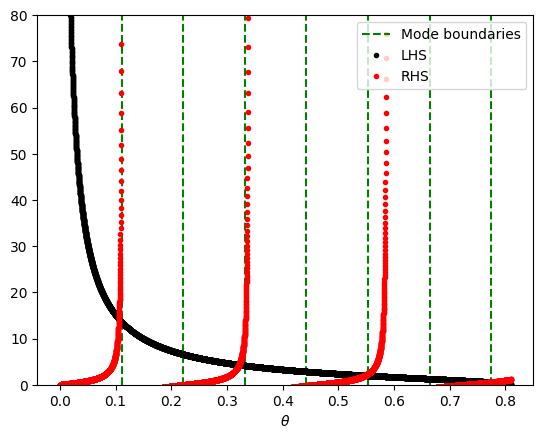

In [16]:
thetas = np.linspace(0, d_mode1.theta_c, 10000)

left_side_equation = lambda theta: np.sqrt( np.sin(d_mode1.theta_c)**2 / np.sin(theta)**2 - 1 ) \
                                / np.cos(d_mode1.theta_c)**2

right_side_equation = lambda theta: np.tan(np.pi * d_mode1.d/d_mode1.wl * np.sin(theta) \
                                           - 0.5*d_mode1.m * np.pi)


mode_boundaries = [i * d_mode1.wl / (2*d_mode1.d) for i in range(1,d_mode1.maximum_mode()+1)]
plt.vlines(mode_boundaries, 0, 100, colors='green', linestyles='dashed', label='Mode boundaries')

plt.plot(thetas, left_side_equation(thetas), 'k.', label='LHS')
plt.plot(thetas, right_side_equation(thetas), 'r.', label='RHS')
plt.xlabel(r"$\theta$")
plt.ylim(0,80)
plt.legend(loc="upper right")
plt.show()

0.9999995929711677
0.9999999999161547
8.384553449740179e-11
1.0000000000000002


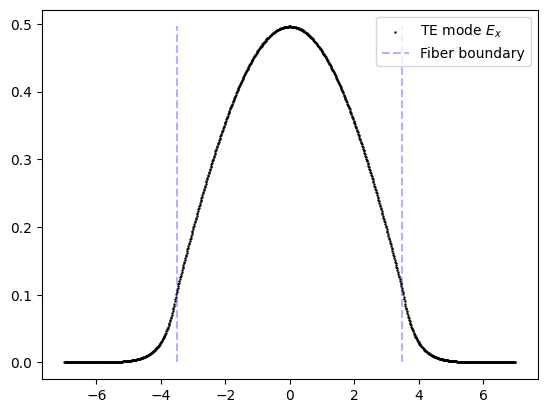

In [17]:
TE_d_mode = guides.TE_DGMode(0, 1.45, 1.3, wavelength, guide_size)

y_range = np.linspace(-guide_size, guide_size, 1000)


TE_d_Ex0 = TE_d_mode.Ex(y_range, 0)

plt.scatter(y_range, TE_d_Ex0, c='k', s=0.5, label=r'TE mode $E_x$')
plt.vlines([-0.5*guide_size, 0.5*guide_size], ymin=np.min(TE_d_Ex0), ymax=np.max(TE_d_Ex0),
           colors='blue', linestyles='dashed', label='Fiber boundary', alpha=0.3)
plt.legend()

from scipy.integrate import quad

integrand = lambda y: TE_d_mode._um(y)**2

integral = quad(integrand, -np.inf, np.inf)[0]
print(integral)
integral = quad(integrand, -guide_size, guide_size)[0]
print(integral)

__, alpha = TE_d_mode.prop_constants()
gamma = TE_d_mode.gamma
rest_of_integral = alpha**2 / gamma * np.exp(-2*gamma*guide_size)

print(rest_of_integral)

print(rest_of_integral + integral)

In [18]:

# z_range = np.linspace(0, 1e-3, 1000)
# yy, zz = np.meshgrid(y_range, z_range)

# fig, axs = plt.subplots(3, 1, figsize=(16,9))
# axs[0].imshow(np.real( TE_Ex * np.conjugate(TE_Ex) ).T, aspect=3/16)
# axs[0].set(title="First mode intensity dristribution", ylabel="y")

# axs[1].imshow(np.real( TM_Ex * np.conjugate(TM_Ex) ).T, aspect=3/16)
# axs[1].set(title="Second mode intensity dristribution", ylabel='y')

# axs[2].imshow(D_ExEx.T, aspect=3/16)
# axs[2].set(title="Combined mode intensity dristribution",
#            xlabel="z", ylabel="y")
# plt.show()